In [1]:
import shap
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("C:/Users/hp/Desktop/Kifya/week_3/Data/clean/MachineLearningRating_v3_cleaned.csv")
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_17252\285289039.py:1: DtypeWarning: Columns (33,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/hp/Desktop/Kifya/week_3/Data/clean/MachineLearningRating_v3_cleaned.csv")


,Unnamed: 0,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,...,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,LossRatio,Month,VehicleMakeModel
0,0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,0.0,2015-03,MERCEDES-BENZ - E 240
1,1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,0.0,2015-05,MERCEDES-BENZ - E 240
2,2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,NaN,2015-07,MERCEDES-BENZ - E 240
3,3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0,0.0,2015-05,MERCEDES-BENZ - E 240
4,4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,NaN,2015-07,MERCEDES-BENZ - E 240


model evaluation

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
nul = df.isna().sum()
nul

Unnamed: 0                        0
UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                    

In [29]:
categorical_cols = df.select_dtypes(include='object').columns
nul = {'Bank','AccountType','MaritalStatus','Gender','mmcode','VehicleType'
,'make','Model','Cylinders','cubiccapacity','kilowatts','bodytype','NumberOfDoors','VehicleIntroDate','CustomValueEstimate',
'NewVehicle','WrittenOff','Rebuilt','Converted','CrossBorder','NumberOfVehiclesInFleet','LossRatio'}
for col in categorical_cols:
    if col not in nul:
        df[col] = df[col].astype(str)
        df[col] = LabelEncoder().fit_transform(df[col])

In [30]:
temp = df.select_dtypes(include=['int','float']).columns
temp1 = []
for col in temp:
    if col not in nul:
        temp1.append(col)
X = df[temp1]
X = X.drop(columns = 'TotalClaims')
y = df['TotalClaims']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train the models

In [32]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    results[name] = {"RMSE": rmse, "R²": r2}

results_df = pd.DataFrame(results).T
print(results_df)

                           RMSE        R²
Linear Regression  4.846086e+06  0.008248
Random Forest      6.375719e+06 -0.304792
XGBoost            5.165094e+06 -0.057037


models interpretation

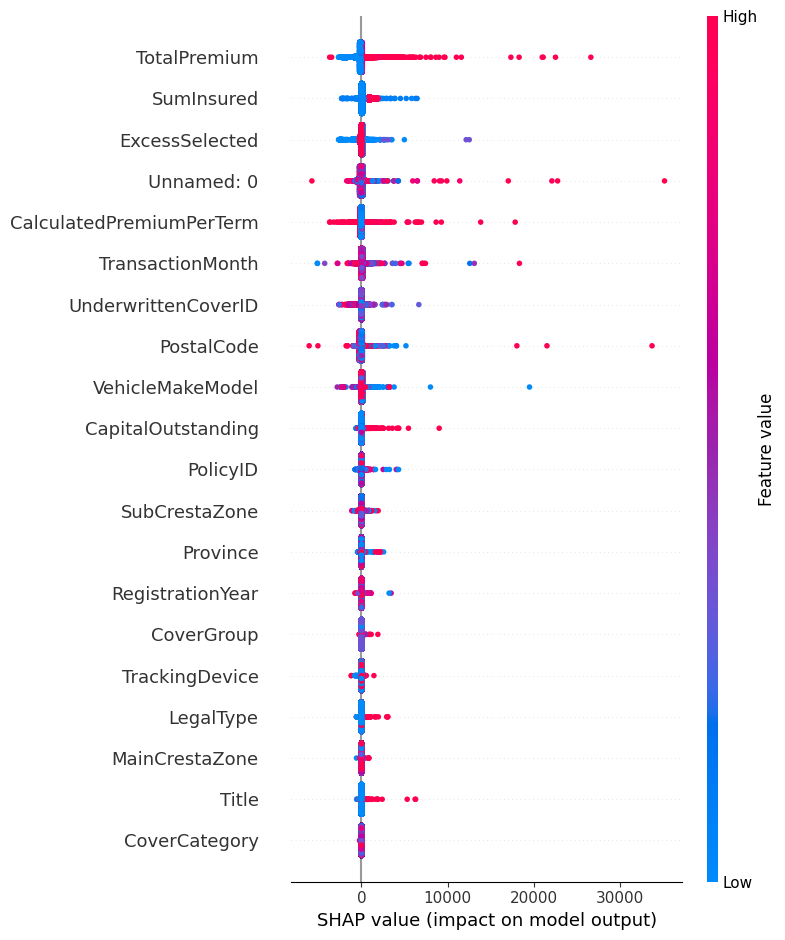

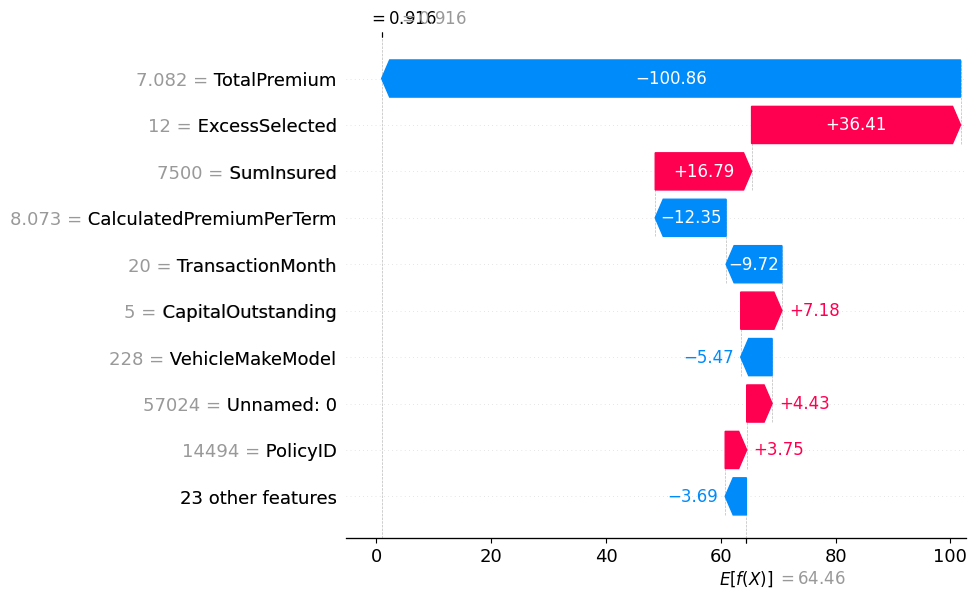

In [33]:
best_model = models["XGBoost"]
explainer = shap.Explainer(best_model)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

# Top feature impact on a single prediction
shap.plots.waterfall(shap_values[0])